<a href="https://colab.research.google.com/github/tk03145/tharun_INFO5502_SPRING2022/blob/main/lab_assignment_06_Rough3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

### You code here:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

data = pd.read_csv("/content/train_luc.csv
# converting datetime column to datetime datatype
data['datetime']=pd.to_datetime(data.datetime)
# we extract hour, day, month values from datetime
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data.head()

In [1]:
### You code here:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

x = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv")
x['datetime']=pd.to_datetime(x.datetime)
x['hour'] = x['datetime'].dt.hour
x['day'] = x['datetime'].dt.day
x['month'] = x['datetime'].dt.month
x.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


(9174, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    9174 non-null   datetime64[ns]
 1   season      9174 non-null   int64         
 2   holiday     9174 non-null   int64         
 3   workingday  9174 non-null   int64         
 4   weather     9174 non-null   int64         
 5   temp        9174 non-null   float64       
 6   atemp       9174 non-null   float64       
 7   humidity    9174 non-null   int64         
 8   windspeed   9174 non-null   float64       
 9   casual      9174 non-null   int64         
 10  registered  9174 non-null   int64         
 11  count       9174 non-null   int64         
 12  hour        9174 non-null   int64         
 13  day         9174 non-null   int64         
 14  month       9174 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.1 MB


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


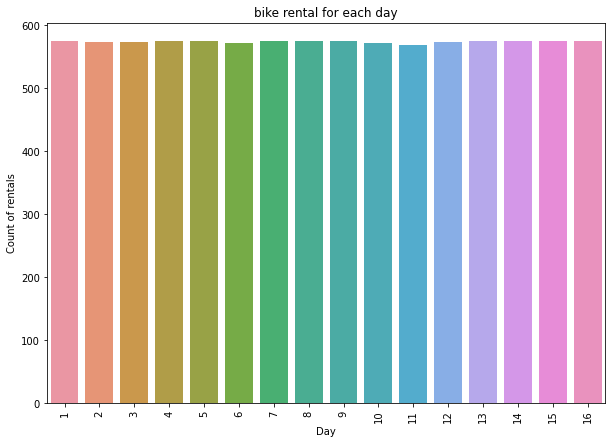

In [16]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 7]
y = sns.countplot(x['day'])
#y.y_label(y.containers[0])

plt.title("bike rental for each day")
plt.xlabel("Day")
plt.ylabel("Count of rentals")
plt.xticks(rotation=90)
plt.show()

. We observe that there are almost same no of rentals on all days

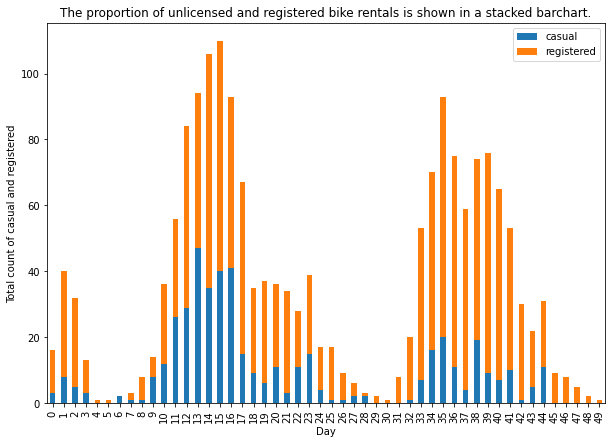

In [15]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 7]
x[['casual', 'registered']][:50].plot(kind='bar', stacked=True)
plt.title("The proportion of unlicensed and registered bike rentals is shown in a stacked barchart.")
plt.xlabel("Day")
plt.ylabel("Total count of casual and registered")
plt.xticks(rotation=90)
plt.show()

. We observe that from the first 50 records, the majority of the rentals are from the registered customers rather than the casual customers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


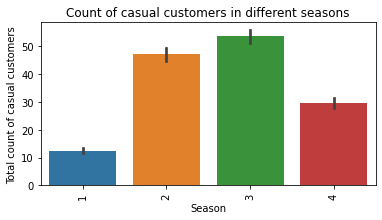

In [14]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [6, 3]
y = sns.barplot('season', 'casual', data = x)
plt.title("Count of casual customers in different seasons")
plt.xlabel("Season")
plt.ylabel("Total count of casual customers")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


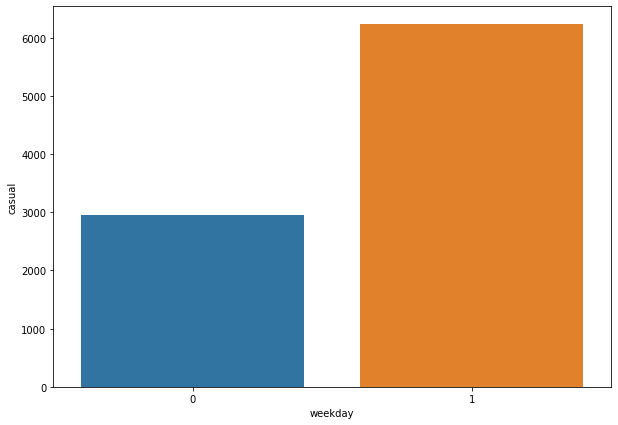

In [17]:
y = sns.countplot(x['workingday'])

plt.xlabel('weekday')
plt.ylabel('casual')
plt.show()

. We can observe that the majority of the rentals are from the weekdays.

In [21]:

for i in ['season', 'weather', 'holiday', 'workingday']:
    x[i] = x[i].astype('object')
one_hot_df = pd.get_dummies(x[['season', 'holiday', 'workingday', 'weather']])
a = x.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)
a = a.join(one_hot_df)
b = x['count']

# Cross Validation

In [22]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
fold = KFold(n_splits=5, shuffle=True, random_state=None)
for train, test in fold.split(x):
    print('train: %s, test: %s' % (train, test))

train: [   0    1    2 ... 9170 9171 9173], test: [   3    4    6 ... 9163 9164 9172]
train: [   0    1    3 ... 9171 9172 9173], test: [   2    7   10 ... 9148 9161 9166]
train: [   1    2    3 ... 9169 9172 9173], test: [   0    8   13 ... 9168 9170 9171]
train: [   0    2    3 ... 9171 9172 9173], test: [   1    5   29 ... 9138 9149 9169]
train: [   0    1    2 ... 9170 9171 9172], test: [   9   18   20 ... 9158 9165 9173]


# Prediction of test dataset

In [25]:

test_d = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
test_d['datetime'] = pd.to_datetime(test_d.datetime)
test_d['hour'] = test_d['datetime'].dt.hour
test_d['month'] = test_d['datetime'].dt.month
for i in ['season', 'weather', 'holiday', 'workingday']:
    test_d[i] = test_d[i].astype('object')

q_hot_test_data = pd.get_dummies(test_d[['season', 'holiday', 'workingday', 'weather']])
test_d= test_d.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
test_d = test_d.join(q_hot_test_data)

In [26]:
# test data doesn't have weather category 4
# we append that column
test_d['weather_4'] = 0

In [31]:
print(test_d.columns)
print(a.columns)

Index(['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')
Index(['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')


# Linear Regression

In [37]:

p = LinearRegression()
p.fit(a.iloc[train], b.iloc[train])
p_ypred = p.predict(a.iloc[test])
m = mean_squared_error(b.iloc[test], p_ypred)
print("RMSE:", np.sqrt(m))
r_squared = r2_score(b.iloc[test], p_ypred)
print("R2 Score:", r_squared)
p_test_pred = p.predict(test_d)
p_test_pred

RMSE: 145.68549762279366
R2 Score: 0.32733883289974863


array([ 13.56384775,  25.63882526,  26.03667134, ..., 253.69209137,
       265.31330766, 257.8784238 ])

# RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(random_state = 211)
m.fit(a.iloc[train], b.iloc[train])
m_ypred = m.predict(a.iloc[test])
mse = mean_squared_error(b.iloc[test], m_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(b.iloc[test], m_ypred)
print("R2 Score: ", r_squared)
rfreg_test_pred = m.predict(test_d)
rfreg_test_pred

RMSE: 68.03618418473941
R2 Score:  0.8532954412879505


array([ 38.29,  27.76,  27.29, ..., 158.54, 150.31,  85.02])

In [43]:
test_d = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
test_d['count'] = rfreg_test_pred

In [44]:
test_d[['datetime', 'count']]

,datetime,count
0,2011-01-17 00:00:00,38.29
1,2011-01-17 01:00:00,27.76
2,2011-01-17 02:00:00,27.29
3,2011-01-17 03:00:00,12.68
4,2011-01-17 04:00:00,6.00
...,...,...
1707,2012-12-19 19:00:00,336.41
1708,2012-12-19 20:00:00,221.31
1709,2012-12-19 21:00:00,158.54
1710,2012-12-19 22:00:00,150.31


In [46]:

test_dx = test_d[['datetime','count']].to_csv('My_prediction.csv', index=False, header=True)

# Prediction of Casual Customers

In [ ]:
X = data.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)
X = X.join(one_hot_df)
y = data['casual']

In [48]:
test_d = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")

test_d['datetime'] = pd.to_datetime(test_d.datetime)

test_d['hour'] = test_d['datetime'].dt.hour
test_d['month'] = test_d['datetime'].dt.month

for i in ['season', 'weather', 'holiday', 'workingday']:
    test_d[i] = test_d[i].astype('object')

q_hot_test_data = pd.get_dummies(test_d[['season', 'holiday', 'workingday', 'weather']])
test_d = test_d.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
test_d = test_d.join(q_hot_test_data)

In [52]:
test_d['weather_4'] = 0

# Casual Customers count prediction using RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(random_state = 211)
rfreg.fit(a.iloc[train], b.iloc[train])
rfreg_ypred = rfreg.predict(a.iloc[test])
mse = mean_squared_error(b.iloc[test], rfreg_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(b.iloc[test], rfreg_ypred)
print("R2 Score:", r_squared)
rfreg_test_pred = rfreg.predict(test_d)
rfreg_test_pred

RMSE: 68.03618418473941
R2 Score: 0.8532954412879505


array([ 38.29,  27.76,  27.29, ..., 158.54, 150.31,  85.02])

In [57]:

test_d = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
test_d['count'] = rfreg_test_pred
test_dx = test_d[['datetime','count']].to_csv('MRoopesh_casual_customers_prediction.csv', index=False, header=True)

# Prediction of Registered Customers

In [ ]:
X = data.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)
X = X.join(one_hot_df)
y = data['registered']

In [60]:
test_d = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")

test_d['datetime'] = pd.to_datetime(test_d.datetime)

test_d['hour'] = test_d['datetime'].dt.hour
#test_data['day'] = test_data['datetime'].dt.day
test_d['month'] = test_d['datetime'].dt.month

for i in ['season', 'weather', 'holiday', 'workingday']:
    test_d[i] = test_d[i].astype('object')

q_hot_test_data = pd.get_dummies(test_d[['season', 'holiday', 'workingday', 'weather']])
test_d = test_d.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
test_d = test_d.join(q_hot_test_data)
test_d['weather_4'] = 0

# Registered Customers count prediction using RandomForestRegressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(random_state = 211)
rfreg.fit(a.iloc[train], b.iloc[train])
rfreg_ypred = rfreg.predict(a.iloc[test])
mse = mean_squared_error(b.iloc[test], rfreg_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(b.iloc[test], rfreg_ypred)
print("R2 Score:",r_squared)
rfreg_test_pred = rfreg.predict(test_d)
rfreg_test_pred

RMSE: 68.03618418473941
R2 Score: 0.8532954412879505


array([ 38.29,  27.76,  27.29, ..., 158.54, 150.31,  85.02])

In [63]:

test_d = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
test_d['count'] = rfreg_test_pred
test_dx = test_d[['datetime','count']].to_csv('My_registered_customers_prediction.csv', index=False, header=True)